# $Explore$ $Zillow$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import scipy.stats as stats


import wrangle_zillow as w
import env

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
### 2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
df = w.get_zillow_data()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,log_error,transaction_date,aircondition,architectural_style,bulding_class,heat_systems,land_use,story,construction_type
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
train, validate, test = w.split_data(df)

<AxesSubplot:xlabel='log_error', ylabel='Count'>

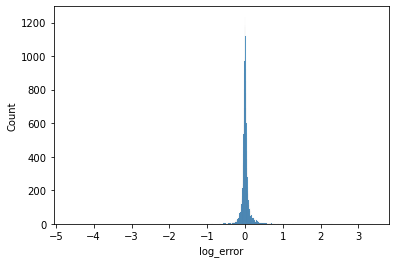

In [4]:
sns.histplot(train['log_error'])

# Question 1: Is logerror significantly different for properties in LA County vs Orange County vs Venture County?

<AxesSubplot:xlabel='fips', ylabel='log_error'>

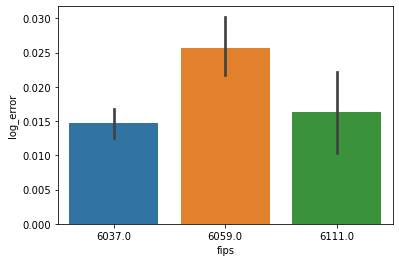

In [5]:
sns.barplot(x='fips',y='log_error', data = train)

In [6]:
train.fips.value_counts()

6037.0    18895
6059.0     7904
6111.0     2499
Name: fips, dtype: int64

In [7]:
stat, p_value = stats.levene(train[train.fips==6037.0].log_error, 
                             train[train.fips==6059.0].log_error,
                             train[train.fips== 6111.0].log_error)
stat, p_value

(19.276877202747134, 4.301923318602041e-09)

$H_0$: Log_error means are the same for all 3 counties

$H_a$: Log_error means are not all equal for all 3 counties

In [8]:
f, p = stats.f_oneway(train[train.fips==6037.0].log_error, 
                             train[train.fips==6059.0].log_error,
                             train[train.fips== 6111.0].log_error)
f, p

(11.711290302540345, 8.239169872164534e-06)

**We reject the null hypothesis, therefore there is evidence to support that log_error mean for all 3 counties is not all equal.**

# Question 2: Is logerror significantly different for properties with exactly 3 bedrooms, less than 3 bedrooms, more than 3 bedrooms?

In [9]:
train.bedroomcnt.value_counts().sort_values()

14.0        1
10.0        2
9.0         5
8.0        14
7.0        52
0.0        69
1.0       355
6.0       382
5.0      2208
2.0      4658
4.0      8578
3.0     12974
Name: bedroomcnt, dtype: int64

In [10]:
# create age bins bedrooms
train['bed_bins'] = pd.cut(train.bedroomcnt, [0,2.99,3, 14],labels = ['beds_lessthan_3', 'beds_equal_3','beds_morethan_3'])
    
train.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,log_error,transaction_date,aircondition,architectural_style,bulding_class,heat_systems,land_use,story,construction_type,bed_bins
32187,608625,14287348,5.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,-0.002954,2017-06-19,None,NaN,NaN,Forced air,Single Family Residential,NaN,NaN,beds_equal_3
9581,2918772,14051217,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,0.006747,2017-03-03,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_morethan_3
5498,2421709,12048802,NaN,NaN,NaN,3.0,4.0,NaN,7.0,3.0,...,-0.000007,2017-02-07,NaN,NaN,NaN,Solar,Single Family Residential,NaN,NaN,beds_morethan_3
34024,1074511,17237439,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,0.104900,2017-06-26,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_equal_3
34547,1592723,14207254,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,-0.012729,2017-06-28,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,beds_morethan_3


In [11]:
train.bed_bins.value_counts()

beds_equal_3       12974
beds_morethan_3    11242
beds_lessthan_3     5013
Name: bed_bins, dtype: int64

<AxesSubplot:xlabel='bed_bins', ylabel='log_error'>

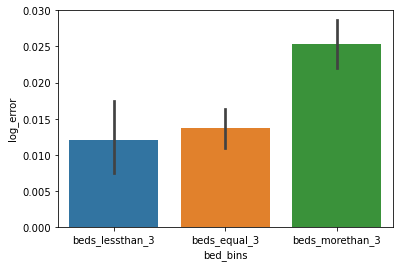

In [12]:
sns.barplot(x='bed_bins',y='log_error', data = train)

In [13]:
stat, p_value = stats.levene(train[train.bed_bins=='beds_equal_3'].log_error, 
                             train[train.bed_bins=='beds_morethan_3'].log_error,
                             train[train.bed_bins== 'beds_lessthan_3' ].log_error)
stat, p_value

(48.15199857544883, 1.3250477693478781e-21)

$H_0$: Log_error means are the same for all 3 bed types

$H_a$: Log_error means are not all equal for all 3 bed types

In [14]:
f, p = stats.f_oneway(train[train.bed_bins=='beds_equal_3'].log_error, 
                      train[train.bed_bins=='beds_morethan_3'].log_error,
                      train[train.bed_bins== 'beds_lessthan_3' ].log_error)
f, p

(17.57972407456051, 2.343211845364437e-08)

**We reject the null hypothesis, therefore there is evidence to support that log_error mean for all 3 bed types is not all equal.**

## Question 2b, Take a closer look into beds more than 3 section to detect anythig odd?


<AxesSubplot:xlabel='log_error', ylabel='bedroomcnt'>

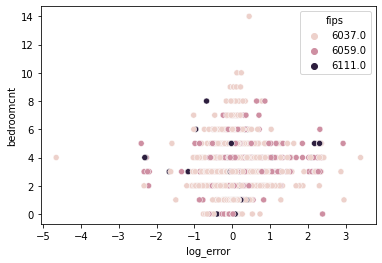

In [15]:
sns.scatterplot(y=train.bedroomcnt,x= train.log_error,hue=train.fips)

# Question 3: Is logerror significantly different for properties with exactly 2 bathrooms, less than 2 bathrooms, more than 2 bathrooms...?

In [16]:
train.bathroomcnt.value_counts().sort_values()

18.0        1
11.0        2
8.5         2
10.0        4
9.0         7
7.5        10
6.5        26
8.0        27
7.0        46
0.0        63
5.5       120
6.0       189
4.5       374
5.0       452
1.5       501
3.5       517
4.0      1163
2.5      2220
1.0      5337
3.0      5985
2.0     12252
Name: bathroomcnt, dtype: int64

In [17]:
train.bathroomcnt.median()

2.0

In [18]:
# create age bins bathrooms
train['bath_bins'] = pd.cut(train.bathroomcnt, [0,1.99,2,3,4,18],labels = ['baths_lessthan_2', 'baths_equal_2','baths2_to_3','baths3_to_4','baths_morethan_4'])
    
train[['bathroomcnt','bath_bins']][train.bathroomcnt < 3]

,bathroomcnt,bath_bins
32187,2.0,baths_equal_2
9581,2.5,baths2_to_3
34024,2.0,baths_equal_2
34547,2.5,baths2_to_3
7058,2.0,baths_equal_2
...,...,...
23668,2.0,baths_equal_2
41674,2.0,baths_equal_2
42471,2.5,baths2_to_3
49174,2.0,baths_equal_2


In [19]:
train.bath_bins.value_counts()

baths_equal_2       12252
baths2_to_3          8205
baths_lessthan_2     5838
baths3_to_4          1680
baths_morethan_4     1260
Name: bath_bins, dtype: int64

<AxesSubplot:xlabel='log_error', ylabel='bath_bins'>

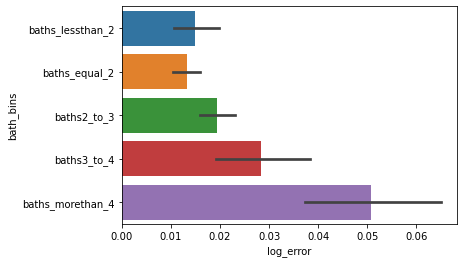

In [20]:
sns.barplot(x='log_error',y='bath_bins', data =train)

In [21]:
train.bath_bins.value_counts()

baths_equal_2       12252
baths2_to_3          8205
baths_lessthan_2     5838
baths3_to_4          1680
baths_morethan_4     1260
Name: bath_bins, dtype: int64

In [22]:
stat, p_value = stats.levene(train[train.bath_bins=='baths_equal_2'].log_error, 
                             train[train.bath_bins=='baths2_to_3'].log_error,
                             train[train.bath_bins== 'baths_lessthan_2' ].log_error,
                             train[train.bath_bins== 'baths3_to_4' ].log_error,
                            train[train.bath_bins== 'baths_morethan_4' ].log_error)
stat, p_value

(50.09368398045566, 4.3634021628557404e-42)

$H_0$: Log_error means are the same for all bath types

$H_a$: Log_error means are not all equal for all bath types

In [23]:
f, p = stats.f_oneway(train[train.bath_bins=='baths_equal_2'].log_error, 
                             train[train.bath_bins=='baths2_to_3'].log_error,
                             train[train.bath_bins== 'baths_lessthan_2' ].log_error,
                             train[train.bath_bins== 'baths3_to_4' ].log_error,
                            train[train.bath_bins== 'baths_morethan_4' ].log_error)
f, p

(16.225663834611154, 2.790422071061611e-13)

**We  reject the null hypothesis. Therefore there is enough evidence to suggest that the means of all bath types are not equal.**

# Quesion 4: Is logerror significanly different for properties above the 75% quantile sqft vs 75% and below ?

In [24]:
train.calculatedfinishedsquarefeet.describe()

count    29259.000000
mean      1916.408797
std        990.646372
min        128.000000
25%       1268.000000
50%       1658.000000
75%       2298.000000
max      18654.000000
Name: calculatedfinishedsquarefeet, dtype: float64

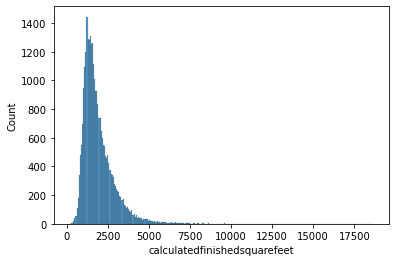

In [25]:
sns.histplot(train.calculatedfinishedsquarefeet);

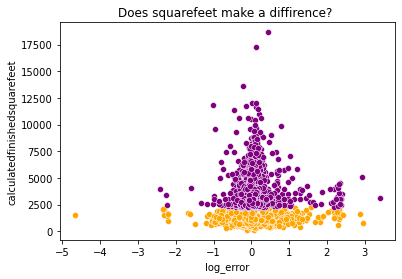

In [26]:
sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet<= 2298], color='orange')

sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet> 2298], 
                color='purple')

plt.title("Does squarefeet make a diffirence? ")
plt.show()

**I do not see a diffirence in log_error with current bins, if anything homes with more squarefootage seem to have less error and closer to the center. If bins were cut diffently maybe less than 5000 and more ant 5000 sqf.**

## Question 4b: Is threre any difference in log_error in homes with less than or equal to 5000sqft and homes above 5000sqft

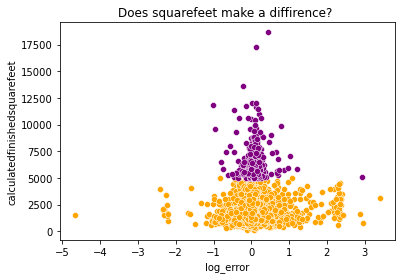

In [27]:
sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet<= 5000], color='orange')

sns.scatterplot(y='calculatedfinishedsquarefeet', x='log_error',
                data=train[train.calculatedfinishedsquarefeet> 5000], 
                color='purple')

plt.title("Does squarefeet make a diffirence? ")
plt.show()

**Properties with less than 5,000 sqft seem to have more log error than houses above 5,000 sqft.**

In [28]:
# create bins
train['sqft_bin']= pd.cut(train.calculatedfinishedsquarefeet,[0,5000,19000],labels = ['lessthan_5000sqft', 'morethan_5000sqft'])

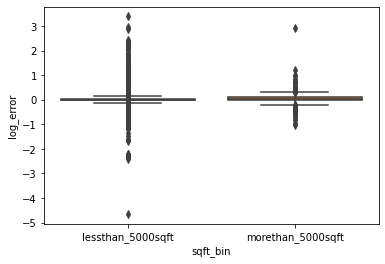

In [29]:
# box plot of the two groups and spending score
sns.boxplot(x=train.sqft_bin, y=train.log_error)
plt.show()

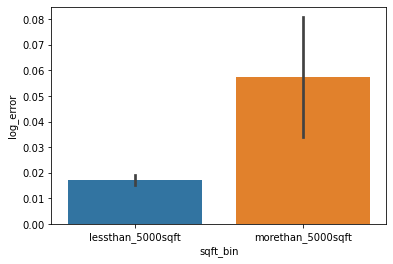

In [30]:
sns.barplot(x= train.sqft_bin, y= train.log_error);

Homes with less than 5000 sqft seem to have more log error.

In [31]:
train.sqft_bin.value_counts()

lessthan_5000sqft    28831
morethan_5000sqft      428
Name: sqft_bin, dtype: int64

In [32]:
stat, p_value = stats.levene(train[train.sqft_bin=='lessthan_5000sqft'].log_error, 
                             train[train.sqft_bin=='morethan_5000sqft'].log_error,)
stat, p_value

(66.88901653454916, 2.987458939201424e-16)

$H_0$: Log_error of properties with less than 5000sqft >= Log_error mean of properties with more than 5000sqft

$H_a$: Log_error of properties with less than 5000sqft < Log_error mean of properties with more than 5000sqft

In [33]:
sample_less = train[train.sqft_bin=='lessthan_5000sqft']
sample_more = train[train.sqft_bin=='morethan_5000sqft']

alpha = 0.05
t, p = stats.ttest_ind(sample_less.log_error,sample_more.log_error,equal_var = True, random_state=123)

print(t, p/2)

-4.829344340147036 6.883757767328211e-07


**Since p/2 is less than 0.05 then we reject null hypothesis. So there is evidence to suggest that the log_error of properties with less than 5000 sqft is more than the log_error than propeties with more than 5000sqft.**

# Question 5: What continuous variables have the correlation with logerror?

In [34]:
train.columns.to_list()

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [35]:
sub_train = train [['basementsqft','finishedfloor1squarefeet','calculatedfinishedsquarefeet','finishedsquarefeet12',
 'finishedsquarefeet13','finishedsquarefeet15', 'finishedsquarefeet50','finishedsquarefeet6','lotsizesquarefeet','log_error']]

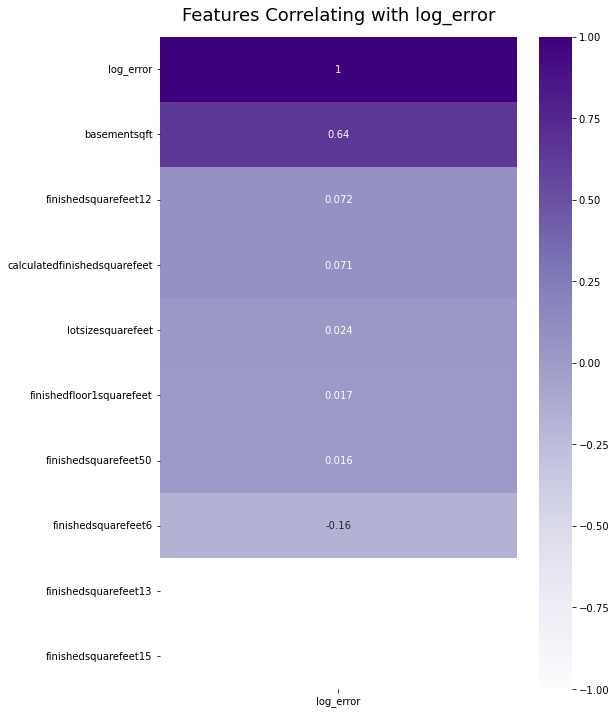

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sub_train.corr(method='spearman')[['log_error']].sort_values(by='log_error', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Features Correlating with log_error', fontdict={'fontsize':18}, pad=16);

# Question 6: Is there more log_error in Older homes?


In [37]:
train.yearbuilt.describe()

count    29244.000000
mean      1963.352893
std         23.141085
min       1880.000000
25%       1950.000000
50%       1960.000000
75%       1979.000000
max       2016.000000
Name: yearbuilt, dtype: float64

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

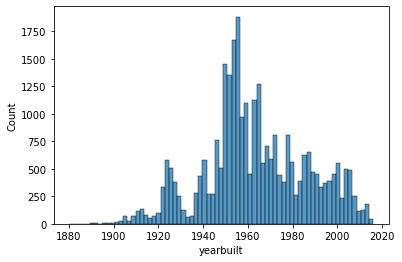

In [38]:
sns.histplot(train.yearbuilt)

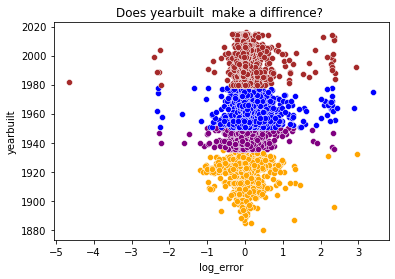

In [39]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt<= 1935], color='orange')

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1935) & (train.yearbuilt<=1950)], 
                color='purple')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[(train.yearbuilt> 1950) & (train.yearbuilt<1979)], 
                color='blue')
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt>1979], 
                color='brown')

plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

**Yearbuilt does not seem to be an indicator of log_error with current bins. There is error in all ages more so in the years 1940 and above. Maybe if bins where distributed diffirently could lead to new discovery**

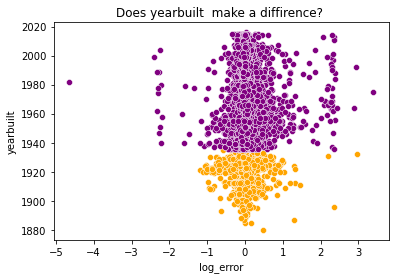

In [40]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt<= 1935], color='orange')

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.yearbuilt> 1935], 
                color='purple')


plt.title("Does yearbuilt  make a diffirence? ")
plt.show()

In [41]:
train['yearbuilt_bins'] = pd.cut(train.yearbuilt, [0,1935,2020],labels = ['homes_lessthan_1935', 'homes_morethan_1935'])


In [42]:
train.yearbuilt_bins.value_counts()

homes_morethan_1935    26144
homes_lessthan_1935     3100
Name: yearbuilt_bins, dtype: int64

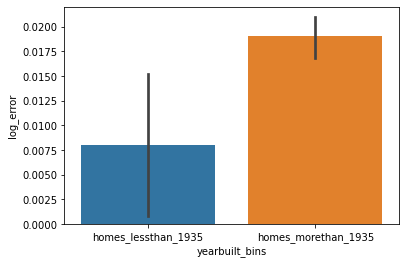

In [43]:
sns.barplot(x= train.yearbuilt_bins, y= train.log_error);

In [44]:
stat, p_value = stats.levene(train[train.yearbuilt_bins=='homes_morethan_1935'].log_error, 
                             train[train.yearbuilt_bins=='homes_lessthan_1935'].log_error)
stat, p_value

(201.22777888117483, 1.5960735381738432e-45)

$H_0$: Log_error of properties whose yearbuilt is less or equal than 1935 >= Log_error mean of properties whose yearbuilt is more than 1935

$H_a$: Log_error of properties whose yearbuilt is less or equal than 1935 < Log_error mean of properties whose yearbuilt is more than 1935

In [45]:
sample_more = train[train.yearbuilt_bins=='homes_morethan_1935']
sample_less= train[train.yearbuilt_bins=='homes_lessthan_1935']

alpha = 0.05
t, p = stats.ttest_ind(sample_less.log_error,sample_more.log_error,equal_var = True, random_state=123)

print(t, p/2)

-3.3979442289943362 0.00033992373336620284


We reject the null hypotheis. There is evidence to suggest that the mean log error of properties whose yearbuilt is below 1935 is mless than log error of homes built after 1935

In [46]:
train.fips

32187    6059.0
9581     6059.0
5498     6037.0
34024    6111.0
34547    6059.0
          ...  
27573    6059.0
42471    6059.0
49174    6059.0
16156    6037.0
39201    6059.0
Name: fips, Length: 29298, dtype: float64

# Random Explore

In [47]:
train.fips.value_counts()

6037.0    18895
6059.0     7904
6111.0     2499
Name: fips, dtype: int64

<AxesSubplot:xlabel='log_error', ylabel='yearbuilt'>

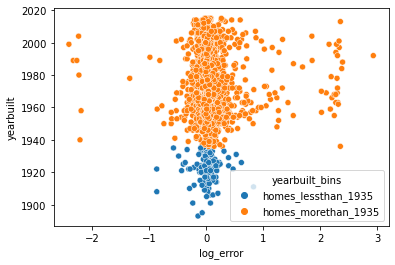

In [48]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.fips== 6059.0], hue = train.yearbuilt_bins,
                color='purple')

<AxesSubplot:xlabel='log_error', ylabel='yearbuilt'>

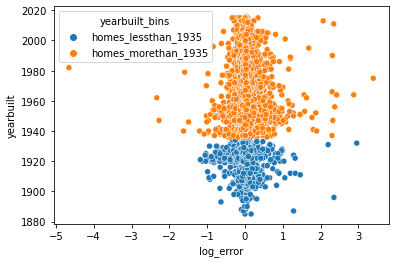

In [49]:
sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.fips== 6037.0], hue = train.yearbuilt_bins,
                color='purple')

<AxesSubplot:xlabel='log_error', ylabel='yearbuilt'>

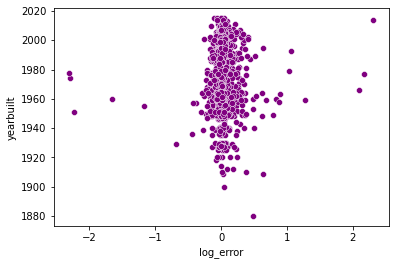

In [50]:

sns.scatterplot(y='yearbuilt', x='log_error',
                data=train[train.fips== 6111.0],
                color='purple')


In [51]:
logerror_sample=train[(train.log_error >0.5 )|(train.log_error<-0.5)]
pos_logerror_sample =train[train.log_error>0.5]
neg_logerror_sample =train[train.log_error> -0.5]

In [52]:
pos_logerror_sample['fips'].value_counts()

6037.0    221
6059.0    100
6111.0     17
Name: fips, dtype: int64

In [53]:
neg_logerror_sample['fips'].value_counts()

6037.0    18781
6059.0     7878
6111.0     2492
Name: fips, dtype: int64

**There is more negative log error than positive log error.**

In [54]:
pos_logerror_sample[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','fips','log_error']].describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,log_error
count,338.000000,338.000000,337.000000,338.000000,338.000000
mean,2.295858,3.281065,2039.456973,6047.230769,0.999403
std,1.286098,1.158505,1383.652187,17.744812,0.593887
min,0.000000,0.000000,400.000000,6037.000000,0.501805
25%,1.000000,3.000000,1166.000000,6037.000000,0.588269
50%,2.000000,3.000000,1580.000000,6037.000000,0.748997
75%,3.000000,4.000000,2463.000000,6059.000000,1.155148
max,9.000000,8.000000,9843.000000,6111.000000,3.394544


In [55]:
neg_logerror_sample[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','fips','log_error']].describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,log_error
count,29151.000000,29151.000000,29114.000000,29151.000000,29151.000000
mean,2.296028,3.305959,1916.178230,6049.271414,0.022429
std,1.016015,0.946641,986.290375,21.174246,0.153566
min,0.000000,0.000000,128.000000,6037.000000,-0.497263
25%,2.000000,3.000000,1269.000000,6037.000000,-0.024005
50%,2.000000,3.000000,1658.000000,6037.000000,0.007094
75%,3.000000,4.000000,2298.000000,6059.000000,0.040815
max,18.000000,14.000000,18654.000000,6111.000000,3.394544


**negative logerror has a smaller spread, positive logerror has a larger spread**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

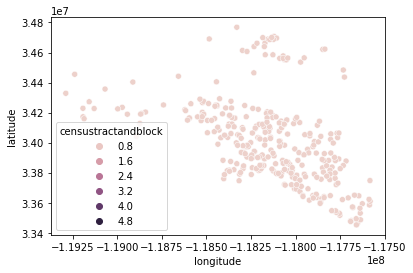

In [66]:
sns.scatterplot(x=pos_logerror_sample.longitude, y=pos_logerror_sample.latitude,hue=neg_logerror_sample.censustractandblock)

In [65]:
neg_logerror_sample.censustractandblock.describe()

count    2.908800e+04
mean     6.051026e+13
std      2.486338e+12
min      6.037101e+13
25%      6.037401e+13
50%      6.037620e+13
75%      6.059042e+13
max      4.830301e+14
Name: censustractandblock, dtype: float64

**There is more negative log error than there is positive log error**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

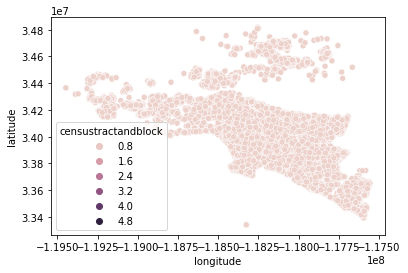

In [64]:
sns.scatterplot(x=neg_logerror_sample.longitude, y=neg_logerror_sample.latitude,hue=neg_logerror_sample.censustractandblock)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

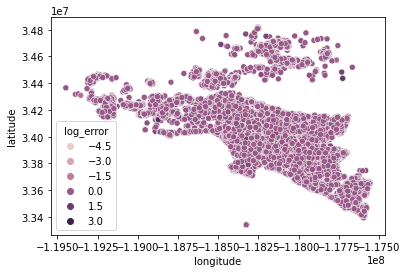

In [69]:
sns.scatterplot(x=train.longitude, y=train.latitude,hue=train.log_error)

In [ ]:
sns.scatterplot(x=train.longitude, y=train.latitude)

In [ ]:
train.log_error.describe().T

In [ ]:
sns.swarmplot(data=train, x='fips',y='log_error')